In [27]:
import kaggle as kg
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.utils import to_categorical

from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import RMSprop

In [2]:
os.environ["KAGGLE_USERNAME"] = "aimlrl"
os.environ["KAGGLE_KEY"] = "54d4150a6ca782d7b27af3f3754eddd8"

In [3]:
kg.api.authenticate()

In [4]:
kg.api.dataset_download_files(dataset="medahmedkrichen/devanagari-handwritten-character-datase",
                              path="dataset",unzip=True)

Dataset URL: https://www.kaggle.com/datasets/medahmedkrichen/devanagari-handwritten-character-datase


2024-07-09 09:05:31,513 WARNING Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7fe245cefb80>: Failed to resolve 'www.kaggle.com' ([Errno -3] Temporary failure in name resolution)")': /api/v1/datasets/download/medahmedkrichen/devanagari-handwritten-character-datase?datasetVersionNumber=None
2024-07-09 09:05:41,527 WARNING Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7fe142dd3f10>: Failed to resolve 'www.kaggle.com' ([Errno -3] Temporary failure in name resolution)")': /api/v1/datasets/download/medahmedkrichen/devanagari-handwritten-character-datase?datasetVersionNumber=None
2024-07-09 09:05:51,543 WARNING Retrying (Retry(total=0, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NameResolutionError("

KeyboardInterrupt: 

dataset/DevanagariHandwrittenCharacterDataset/Train/character_3_ga/84217.png
(32, 32)


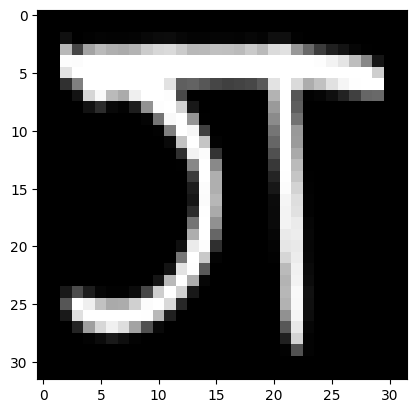

In [2]:
for single_class_dir_path in pathlib.Path("dataset/DevanagariHandwrittenCharacterDataset/Train").glob("*"):

    for single_class_img_path in pathlib.Path(single_class_dir_path).glob("*.png"):

        print(single_class_img_path)
                
        print(plt.imread(single_class_img_path).shape)

        plt.imshow(plt.imread(single_class_img_path),cmap="gray")

        break

    break        

In [3]:
def train_test_df(path):

    img_path = list()
    img_label = list()

    for single_class_dir_path in pathlib.Path(path).glob("*"):

        for single_class_img_path in pathlib.Path(single_class_dir_path).glob("*.png"):

            img_path.append(str(single_class_img_path))
            #print(str(single_class_img_path).split("/")[-2].split("_")[-1])
            img_label.append(str(single_class_img_path).split("/")[-2].split("_")[-1])

    return pd.DataFrame(data={"img_path":img_path,"label":img_label})        

In [4]:
train_path = "dataset/DevanagariHandwrittenCharacterDataset/Train"
test_path = "dataset/DevanagariHandwrittenCharacterDataset/Test"

In [5]:
training_data = train_test_df(train_path)
testing_data = train_test_df(test_path)

In [6]:
training_data

,img_path,label
0,dataset/DevanagariHandwrittenCharacterDataset/...,ga
1,dataset/DevanagariHandwrittenCharacterDataset/...,ga
2,dataset/DevanagariHandwrittenCharacterDataset/...,ga
3,dataset/DevanagariHandwrittenCharacterDataset/...,ga
4,dataset/DevanagariHandwrittenCharacterDataset/...,ga
...,...,...
78195,dataset/DevanagariHandwrittenCharacterDataset/...,ja
78196,dataset/DevanagariHandwrittenCharacterDataset/...,ja
78197,dataset/DevanagariHandwrittenCharacterDataset/...,ja
78198,dataset/DevanagariHandwrittenCharacterDataset/...,ja


In [7]:
testing_data

,img_path,label
0,dataset/DevanagariHandwrittenCharacterDataset/...,ga
1,dataset/DevanagariHandwrittenCharacterDataset/...,ga
2,dataset/DevanagariHandwrittenCharacterDataset/...,ga
3,dataset/DevanagariHandwrittenCharacterDataset/...,ga
4,dataset/DevanagariHandwrittenCharacterDataset/...,ga
...,...,...
13795,dataset/DevanagariHandwrittenCharacterDataset/...,ja
13796,dataset/DevanagariHandwrittenCharacterDataset/...,ja
13797,dataset/DevanagariHandwrittenCharacterDataset/...,ja
13798,dataset/DevanagariHandwrittenCharacterDataset/...,ja


In [8]:
character2int = dict(zip(training_data["label"].unique(),range(len(training_data["label"].unique()))))

In [9]:
character2int

{'ga': 0,
 'yna': 1,
 'la': 2,
 '8': 3,
 'dha': 4,
 'ma': 5,
 '1': 6,
 'petchiryakha': 7,
 'taamatar': 8,
 'cha': 9,
 'bha': 10,
 'gha': 11,
 'tabala': 12,
 '7': 13,
 'yaw': 14,
 'daa': 15,
 'thaa': 16,
 '0': 17,
 'tra': 18,
 'chhya': 19,
 '4': 20,
 'na': 21,
 'da': 22,
 '9': 23,
 'patalosaw': 24,
 'pha': 25,
 'jha': 26,
 'waw': 27,
 'tha': 28,
 '3': 29,
 'chha': 30,
 'gya': 31,
 '2': 32,
 'ka': 33,
 'ba': 34,
 'ha': 35,
 'kha': 36,
 'motosaw': 37,
 'dhaa': 38,
 'pa': 39,
 'kna': 40,
 'adna': 41,
 '5': 42,
 '6': 43,
 'ra': 44,
 'ja': 45}

In [10]:
training_data["label"].replace(to_replace=character2int.keys(),value=character2int.values(),
                               inplace=True)

/tmp/ipykernel_21978/2698354796.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  training_data["label"].replace(to_replace=character2int.keys(),value=character2int.values(),
/tmp/ipykernel_21978/2698354796.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  training_data["label"].replace(to_repla

In [11]:
training_data

,img_path,label
0,dataset/DevanagariHandwrittenCharacterDataset/...,0
1,dataset/DevanagariHandwrittenCharacterDataset/...,0
2,dataset/DevanagariHandwrittenCharacterDataset/...,0
3,dataset/DevanagariHandwrittenCharacterDataset/...,0
4,dataset/DevanagariHandwrittenCharacterDataset/...,0
...,...,...
78195,dataset/DevanagariHandwrittenCharacterDataset/...,45
78196,dataset/DevanagariHandwrittenCharacterDataset/...,45
78197,dataset/DevanagariHandwrittenCharacterDataset/...,45
78198,dataset/DevanagariHandwrittenCharacterDataset/...,45


In [12]:
testing_data.replace(to_replace=character2int.keys(),value=character2int.values(),
                     inplace=True)

/tmp/ipykernel_21978/3185811566.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  testing_data.replace(to_replace=character2int.keys(),value=character2int.values(),


In [13]:
testing_data

,img_path,label
0,dataset/DevanagariHandwrittenCharacterDataset/...,0
1,dataset/DevanagariHandwrittenCharacterDataset/...,0
2,dataset/DevanagariHandwrittenCharacterDataset/...,0
3,dataset/DevanagariHandwrittenCharacterDataset/...,0
4,dataset/DevanagariHandwrittenCharacterDataset/...,0
...,...,...
13795,dataset/DevanagariHandwrittenCharacterDataset/...,45
13796,dataset/DevanagariHandwrittenCharacterDataset/...,45
13797,dataset/DevanagariHandwrittenCharacterDataset/...,45
13798,dataset/DevanagariHandwrittenCharacterDataset/...,45


In [14]:
Y_true_train = to_categorical(y=training_data["label"],num_classes=46)

In [15]:
Y_true_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [16]:
Y_true_test = to_categorical(y=testing_data["label"],num_classes=46)

In [17]:
Y_true_test

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [18]:
def multiclass_dnn():

    input_to_dnn = Input(shape=(1024,))
    first_dense_out = Dense(units=1024,activation="relu") (input_to_dnn)
    output = Dense(units=46,activation="softmax") (first_dense_out)

    return Model(inputs=[input_to_dnn],outputs=[output])

In [36]:
def custom_data_generator(data_df, mb_size):

    for time_step in range(data_df.shape[0]//mb_size):
        X_train_mb = list()

        for img_path in data_df.iloc[time_step*mb_size:(time_step+1)*mb_size,0]:

            img_np_array = plt.imread(img_path)
            reshaped_np_array = img_np_array.reshape(1024,)
            X_train_mb.append(reshaped_np_array)

        X_train_mb = np.array(X_train_mb)
        Y_train_mb = Y_true_train[time_step*mb_size:(time_step+1)*mb_size]

        yield X_train_mb, Y_train_mb

In [37]:
mb_size = 782

In [38]:
generator = custom_data_generator(training_data,mb_size)

In [39]:
generator

<generator object custom_data_generator at 0x7f8819d01a10>

In [40]:
X_train_mb, Y_train_mb = generator.__next__()

In [42]:
np.max(X_train_mb,axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [23]:
Y_train_mb.shape

(782, 46)

In [24]:
model = multiclass_dnn()

In [25]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dense_1 (Dense)             (None, 46)                47150     
                                                                 
Total params: 1096750 (4.18 MB)
Trainable params: 1096750 (4.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
def loss_fn(Y_train_mb,Y_pred_mb):

    return tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_true=Y_train_mb,
                                                                   y_pred=Y_pred_mb))

In [30]:
optimizer = RMSprop()

In [ ]:
epochs = 10
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))

    # Iterate over the batches of the dataset.
    for step, (X_train_mb, Y_train_mb) in enumerate(generator):
        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:
            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
            Y_pred_mb = model(X_train_mb, training=True)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
            loss_value = loss_fn(Y_train_mb, Y_pred_mb)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Log every 50 batches.
        if step % 50 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %s samples" % ((step + 1) * mb_size))